In [183]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import  GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [184]:
df_order_detail= pd.read_csv("/Users/alism/Documents/csv/order_detail.csv")
df_order=pd.read_csv("/Users/alism/Documents/csv/merge_order.csv")
df_product=pd.read_csv("/Users/alism/Documents/csv/product.csv")
df_return=pd.read_csv("/Users/alism/Documents/csv/return.csv")
df_shipping=pd.read_csv("/Users/alism/Documents/csv/shipping.csv")


In [185]:
df_shipping

,Shipping ID,Order ID,Ship Date,Ship Mode,City,State,Country,Region,superstore.order
0,21043,CA-2012-124891,2012-07-31T00:00:00.0000000,Same Day,New York City,New York,United States,East,[Value]
1,21044,IN-2013-77878,2013-02-07T00:00:00.0000000,Second Class,Wollongong,New South Wales,Australia,Oceania,[Value]
2,21045,IN-2013-71249,2013-10-18T00:00:00.0000000,First Class,Brisbane,Queensland,Australia,Oceania,[Value]
3,21046,ES-2013-1579342,2013-01-30T00:00:00.0000000,First Class,Berlin,Berlin,Germany,Central,[Value]
4,21047,SG-2013-4320,2013-11-06T00:00:00.0000000,Same Day,Dakar,Dakar,Senegal,Africa,[Value]
...,...,...,...,...,...,...,...,...,...
25028,46071,ZI-2011-4350,2011-03-26T00:00:00.0000000,Standard Class,Harare,Harare,Zimbabwe,Africa,[Value]
25029,46072,MX-2014-169530,2014-06-11T00:00:00.0000000,First Class,Bragança Paulista,São Paulo,Brazil,South,[Value]
25030,46073,IN-2014-72327,2014-05-30T00:00:00.0000000,Same Day,Lucknow,Uttar Pradesh,India,Central Asia,[Value]
25031,46074,IN-2014-57662,2014-08-10T00:00:00.0000000,Standard Class,Townsville,Queensland,Australia,Oceania,[Value]


In [186]:
df_order_detail.shape

(49670, 10)

In [187]:
df_order.head(5)

,Order ID,Customer ID,Order Priority,Order Date,Market,superstore.order_detail,superstore.returned,superstore.shipping,superstore customer
0,AE-2011-9160,PO-18865,Medium,2011-10-03T00:00:00.0000000,EMEA,[Table],[Table],[Table],[Table]
1,AG-2014-6470,PO-18865,Critical,2014-01-13T00:00:00.0000000,Africa,[Table],[Table],[Table],[Table]
2,CA-2011-128055,AA-10315,Medium,2011-03-31T00:00:00.0000000,US,[Table],[Table],[Table],[Table]
3,CA-2011-138100,AA-10315,Medium,2011-09-15T00:00:00.0000000,US,[Table],[Table],[Table],[Table]
4,CA-2012-121391,AA-10315,Critical,2012-10-04T00:00:00.0000000,US,[Table],[Table],[Table],[Table]


In [188]:
df_order.shape

(25033, 9)

In [189]:
df_product.shape

(10246, 5)

In [190]:
df_order_detail.head(5)

,Row ID,Order ID,Product ID,Sales,Quantity,Discount,Profit,Shipping Cost,superstore.order,superstore.product
0,1,MX-2014-143658,OFF-LA-10002782,13.08,3,0.0,4.56,1.033,[Value],[Value]
1,2,MX-2012-155047,FUR-FU-10004015,252.16,8,0.0,90.72,13.449,[Value],[Value]
2,3,MX-2012-155047,FUR-BO-10002352,193.28,2,0.0,54.08,9.627,[Value],[Value]
3,4,MX-2012-155047,OFF-BI-10004428,35.44,4,0.0,4.96,1.371,[Value],[Value]
4,5,MX-2012-155047,OFF-AR-10004594,71.60,2,0.0,11.44,3.787,[Value],[Value]


In [191]:
df_product.head(5)

,Product ID,Product Name,Category,Sub-Category,superstore.order_detail
0,FUR-ADV-10000002,"Advantus Photo Frame, Duo Pack",Furniture,Furnishings,[Table]
1,FUR-ADV-10000108,"Advantus Clock, Erganomic",Furniture,Furnishings,[Table]
2,FUR-ADV-10000183,"Advantus Photo Frame, Black",Furniture,Furnishings,[Table]
3,FUR-ADV-10000188,"Advantus Stacking Tray, Erganomic",Furniture,Furnishings,[Table]
4,FUR-ADV-10000190,"Advantus Frame, Duo Pack",Furniture,Furnishings,[Table]


In [192]:
df_return


,Order ID,superstore.order
0,CA-2011-100762,[Value]
1,CA-2011-100867,[Value]
2,CA-2011-102652,[Value]
3,CA-2011-103373,[Value]
4,CA-2011-103744,[Value]
...,...,...
1167,US-2014-160745,[Value]
1168,US-2014-161830,[Value]
1169,US-2014-167178,[Value]
1170,US-2014-167500,[Value]


In [193]:
df_order['is_returned'] = df_order['Order ID'].isin(df_return['Order ID']).astype(int)
df_order[df_order['is_returned'] ==1]


,Order ID,Customer ID,Order Priority,Order Date,Market,superstore.order_detail,superstore.returned,superstore.shipping,superstore customer,is_returned
42,CA-2011-108609,AJ-10780,Critical,2011-10-31T00:00:00.0000000,US,[Table],[Table],[Table],[Table],1
125,CA-2012-111948,AG-10495,Critical,2012-11-11T00:00:00.0000000,US,[Table],[Table],[Table],[Table],1
140,CA-2012-130785,AG-10900,Medium,2012-09-05T00:00:00.0000000,US,[Table],[Table],[Table],[Table],1
189,CA-2012-113628,AH-10690,Medium,2012-11-12T00:00:00.0000000,US,[Table],[Table],[Table],[Table],1
226,CA-2011-110786,AJ-10795,High,2011-12-29T00:00:00.0000000,US,[Table],[Table],[Table],[Table],1
...,...,...,...,...,...,...,...,...,...,...
24813,US-2014-160745,MT-17815,High,2014-10-29T00:00:00.0000000,LATAM,[Table],[Table],[Table],[Table],1
24822,US-2014-161830,GB-14530,Medium,2014-03-12T00:00:00.0000000,LATAM,[Table],[Table],[Table],[Table],1
24876,US-2014-167178,SC-20845,Medium,2014-05-01T00:00:00.0000000,LATAM,[Table],[Table],[Table],[Table],1
24882,US-2014-167500,TS-21655,High,2014-10-08T00:00:00.0000000,LATAM,[Table],[Table],[Table],[Table],1


In [194]:
df_order = df_order.drop(['superstore.returned', 'superstore.order_detail','superstore.shipping','superstore customer'], axis=1)
df_order

,Order ID,Customer ID,Order Priority,Order Date,Market,is_returned
0,AE-2011-9160,PO-18865,Medium,2011-10-03T00:00:00.0000000,EMEA,0
1,AG-2014-6470,PO-18865,Critical,2014-01-13T00:00:00.0000000,Africa,0
2,CA-2011-128055,AA-10315,Medium,2011-03-31T00:00:00.0000000,US,0
3,CA-2011-138100,AA-10315,Medium,2011-09-15T00:00:00.0000000,US,0
4,CA-2012-121391,AA-10315,Critical,2012-10-04T00:00:00.0000000,US,0
...,...,...,...,...,...,...
25028,ZI-2014-7160,EH-14125,Medium,2014-10-30T00:00:00.0000000,Africa,0
25029,ZI-2014-7610,BS-11380,Medium,2014-03-24T00:00:00.0000000,Africa,0
25030,ZI-2014-9540,BT-11395,Medium,2014-06-09T00:00:00.0000000,Africa,0
25031,ZI-2014-9550,JC-15775,Medium,2014-12-18T00:00:00.0000000,Africa,0


In [195]:
df_order[df_order['is_returned'].isnull()]


,Order ID,Customer ID,Order Priority,Order Date,Market,is_returned


In [196]:
df_merged = pd.merge(df_order, df_order_detail, on='Order ID', how='inner')
df_merged

,Order ID,Customer ID,Order Priority,Order Date,Market,is_returned,Row ID,Product ID,Sales,Quantity,Discount,Profit,Shipping Cost,superstore.order,superstore.product
0,AE-2011-9160,PO-18865,Medium,2011-10-03T00:00:00.0000000,EMEA,0,48312,TEC-EPS-10004171,78.408,6,0.7,-88.992,3.87,[Value],[Value]
1,AE-2011-9160,PO-18865,Medium,2011-10-03T00:00:00.0000000,EMEA,0,48313,OFF-FEL-10001405,82.674,2,0.7,-157.086,5.69,[Value],[Value]
2,AG-2014-6470,PO-18865,Critical,2014-01-13T00:00:00.0000000,Africa,0,48543,OFF-FIS-10000063,47.640,1,0.0,23.340,13.85,[Value],[Value]
3,AG-2014-6470,PO-18865,Critical,2014-01-13T00:00:00.0000000,Africa,0,48544,OFF-ACC-10003636,105.180,2,0.0,25.200,3.66,[Value],[Value]
4,AG-2014-6470,PO-18865,Critical,2014-01-13T00:00:00.0000000,Africa,0,48545,TEC-SHA-10004874,293.850,1,0.0,61.680,70.93,[Value],[Value]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49665,ZI-2014-7610,BS-11380,Medium,2014-03-24T00:00:00.0000000,Africa,0,42070,OFF-ADV-10000551,4.077,1,0.7,-9.513,0.09,[Value],[Value]
49666,ZI-2014-9540,BT-11395,Medium,2014-06-09T00:00:00.0000000,Africa,0,48836,OFF-BIN-10001274,7.164,2,0.7,-6.696,0.35,[Value],[Value]
49667,ZI-2014-9550,JC-15775,Medium,2014-12-18T00:00:00.0000000,Africa,0,48372,TEC-KON-10003116,71.640,2,0.7,-93.180,4.05,[Value],[Value]
49668,ZI-2014-9550,JC-15775,Medium,2014-12-18T00:00:00.0000000,Africa,0,48373,OFF-AVE-10000543,1.161,1,0.7,-2.349,0.07,[Value],[Value]


In [197]:
df_merged = df_merged.drop(['superstore.order', 'superstore.product'], axis=1)
df_merged

,Order ID,Customer ID,Order Priority,Order Date,Market,is_returned,Row ID,Product ID,Sales,Quantity,Discount,Profit,Shipping Cost
0,AE-2011-9160,PO-18865,Medium,2011-10-03T00:00:00.0000000,EMEA,0,48312,TEC-EPS-10004171,78.408,6,0.7,-88.992,3.87
1,AE-2011-9160,PO-18865,Medium,2011-10-03T00:00:00.0000000,EMEA,0,48313,OFF-FEL-10001405,82.674,2,0.7,-157.086,5.69
2,AG-2014-6470,PO-18865,Critical,2014-01-13T00:00:00.0000000,Africa,0,48543,OFF-FIS-10000063,47.640,1,0.0,23.340,13.85
3,AG-2014-6470,PO-18865,Critical,2014-01-13T00:00:00.0000000,Africa,0,48544,OFF-ACC-10003636,105.180,2,0.0,25.200,3.66
4,AG-2014-6470,PO-18865,Critical,2014-01-13T00:00:00.0000000,Africa,0,48545,TEC-SHA-10004874,293.850,1,0.0,61.680,70.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49665,ZI-2014-7610,BS-11380,Medium,2014-03-24T00:00:00.0000000,Africa,0,42070,OFF-ADV-10000551,4.077,1,0.7,-9.513,0.09
49666,ZI-2014-9540,BT-11395,Medium,2014-06-09T00:00:00.0000000,Africa,0,48836,OFF-BIN-10001274,7.164,2,0.7,-6.696,0.35
49667,ZI-2014-9550,JC-15775,Medium,2014-12-18T00:00:00.0000000,Africa,0,48372,TEC-KON-10003116,71.640,2,0.7,-93.180,4.05
49668,ZI-2014-9550,JC-15775,Medium,2014-12-18T00:00:00.0000000,Africa,0,48373,OFF-AVE-10000543,1.161,1,0.7,-2.349,0.07


In [198]:
df_product_order_detail = pd.merge(df_merged, df_product, on='Product ID', how='inner')
df_product_order_detail

,Order ID,Customer ID,Order Priority,Order Date,Market,is_returned,Row ID,Product ID,Sales,Quantity,Discount,Profit,Shipping Cost,Product Name,Category,Sub-Category,superstore.order_detail
0,AE-2011-9160,PO-18865,Medium,2011-10-03T00:00:00.0000000,EMEA,0,48312,TEC-EPS-10004171,78.408,6,0.7,-88.992,3.87,"Epson Calculator, Red",Technology,Machines,[Table]
1,AE-2011-9160,PO-18865,Medium,2011-10-03T00:00:00.0000000,EMEA,0,48313,OFF-FEL-10001405,82.674,2,0.7,-157.086,5.69,"Fellowes File Cart, Industrial",Office Supplies,Storage,[Table]
2,AG-2014-6470,PO-18865,Critical,2014-01-13T00:00:00.0000000,Africa,0,48543,OFF-FIS-10000063,47.640,1,0.0,23.340,13.85,"Fiskars Shears, High Speed",Office Supplies,Supplies,[Table]
3,AG-2014-6470,PO-18865,Critical,2014-01-13T00:00:00.0000000,Africa,0,48544,OFF-ACC-10003636,105.180,2,0.0,25.200,3.66,"Acco Binding Machine, Durable",Office Supplies,Binders,[Table]
4,AG-2014-6470,PO-18865,Critical,2014-01-13T00:00:00.0000000,Africa,0,48545,TEC-SHA-10004874,293.850,1,0.0,61.680,70.93,"Sharp Fax Machine, High-Speed",Technology,Copiers,[Table]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49665,ZI-2014-7610,BS-11380,Medium,2014-03-24T00:00:00.0000000,Africa,0,42070,OFF-ADV-10000551,4.077,1,0.7,-9.513,0.09,"Advantus Thumb Tacks, Bulk Pack",Office Supplies,Fasteners,[Table]
49666,ZI-2014-9540,BT-11395,Medium,2014-06-09T00:00:00.0000000,Africa,0,48836,OFF-BIN-10001274,7.164,2,0.7,-6.696,0.35,"Binney & Smith Pens, Blue",Office Supplies,Art,[Table]
49667,ZI-2014-9550,JC-15775,Medium,2014-12-18T00:00:00.0000000,Africa,0,48372,TEC-KON-10003116,71.640,2,0.7,-93.180,4.05,"Konica Receipt Printer, Red",Technology,Machines,[Table]
49668,ZI-2014-9550,JC-15775,Medium,2014-12-18T00:00:00.0000000,Africa,0,48373,OFF-AVE-10000543,1.161,1,0.7,-2.349,0.07,"Avery Hole Reinforcements, Clear",Office Supplies,Binders,[Table]


In [199]:
# df_shipping
df_final = pd.merge(df_product_order_detail, df_shipping, on='Order ID', how='inner')
df_final

,Order ID,Customer ID,Order Priority,Order Date,Market,is_returned,Row ID,Product ID,Sales,Quantity,...,Sub-Category,superstore.order_detail,Shipping ID,Ship Date,Ship Mode,City,State,Country,Region,superstore.order
0,AE-2011-9160,PO-18865,Medium,2011-10-03T00:00:00.0000000,EMEA,0,48312,TEC-EPS-10004171,78.408,6,...,Machines,[Table],38921,2011-10-07T00:00:00.0000000,Standard Class,Ajman,'Ajman,United Arab Emirates,EMEA,[Value]
1,AE-2011-9160,PO-18865,Medium,2011-10-03T00:00:00.0000000,EMEA,0,48313,OFF-FEL-10001405,82.674,2,...,Storage,[Table],38921,2011-10-07T00:00:00.0000000,Standard Class,Ajman,'Ajman,United Arab Emirates,EMEA,[Value]
2,AG-2014-6470,PO-18865,Critical,2014-01-13T00:00:00.0000000,Africa,0,48543,OFF-FIS-10000063,47.640,1,...,Supplies,[Table],24972,2014-01-15T00:00:00.0000000,First Class,Guelma,Guelma,Algeria,Africa,[Value]
3,AG-2014-6470,PO-18865,Critical,2014-01-13T00:00:00.0000000,Africa,0,48544,OFF-ACC-10003636,105.180,2,...,Binders,[Table],24972,2014-01-15T00:00:00.0000000,First Class,Guelma,Guelma,Algeria,Africa,[Value]
4,AG-2014-6470,PO-18865,Critical,2014-01-13T00:00:00.0000000,Africa,0,48545,TEC-SHA-10004874,293.850,1,...,Copiers,[Table],24972,2014-01-15T00:00:00.0000000,First Class,Guelma,Guelma,Algeria,Africa,[Value]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49665,ZI-2014-7610,BS-11380,Medium,2014-03-24T00:00:00.0000000,Africa,0,42070,OFF-ADV-10000551,4.077,1,...,Fasteners,[Table],42764,2014-03-28T00:00:00.0000000,Standard Class,Bulawayo,Bulawayo,Zimbabwe,Africa,[Value]
49666,ZI-2014-9540,BT-11395,Medium,2014-06-09T00:00:00.0000000,Africa,0,48836,OFF-BIN-10001274,7.164,2,...,Art,[Table],45779,2014-06-15T00:00:00.0000000,Standard Class,Harare,Harare,Zimbabwe,Africa,[Value]
49667,ZI-2014-9550,JC-15775,Medium,2014-12-18T00:00:00.0000000,Africa,0,48372,TEC-KON-10003116,71.640,2,...,Machines,[Table],40523,2014-12-23T00:00:00.0000000,Standard Class,Bulawayo,Bulawayo,Zimbabwe,Africa,[Value]
49668,ZI-2014-9550,JC-15775,Medium,2014-12-18T00:00:00.0000000,Africa,0,48373,OFF-AVE-10000543,1.161,1,...,Binders,[Table],40523,2014-12-23T00:00:00.0000000,Standard Class,Bulawayo,Bulawayo,Zimbabwe,Africa,[Value]


In [200]:
df_final.columns

Index(['Order ID', 'Customer ID', 'Order Priority', 'Order Date', 'Market',
       'is_returned', 'Row ID', 'Product ID', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Product Name', 'Category', 'Sub-Category',
       'superstore.order_detail', 'Shipping ID', 'Ship Date', 'Ship Mode',
       'City', 'State', 'Country', 'Region', 'superstore.order'],
      dtype='object')

In [201]:
df_final = df_final.drop(['superstore.order_detail', 'Product Name','Row ID','Order Date','Customer ID','Order ID','Product ID','State','Ship Date','City'], axis=1)
df_final

,Order Priority,Market,is_returned,Sales,Quantity,Discount,Profit,Shipping Cost,Category,Sub-Category,Shipping ID,Ship Mode,Country,Region,superstore.order
0,Medium,EMEA,0,78.408,6,0.7,-88.992,3.87,Technology,Machines,38921,Standard Class,United Arab Emirates,EMEA,[Value]
1,Medium,EMEA,0,82.674,2,0.7,-157.086,5.69,Office Supplies,Storage,38921,Standard Class,United Arab Emirates,EMEA,[Value]
2,Critical,Africa,0,47.640,1,0.0,23.340,13.85,Office Supplies,Supplies,24972,First Class,Algeria,Africa,[Value]
3,Critical,Africa,0,105.180,2,0.0,25.200,3.66,Office Supplies,Binders,24972,First Class,Algeria,Africa,[Value]
4,Critical,Africa,0,293.850,1,0.0,61.680,70.93,Technology,Copiers,24972,First Class,Algeria,Africa,[Value]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49665,Medium,Africa,0,4.077,1,0.7,-9.513,0.09,Office Supplies,Fasteners,42764,Standard Class,Zimbabwe,Africa,[Value]
49666,Medium,Africa,0,7.164,2,0.7,-6.696,0.35,Office Supplies,Art,45779,Standard Class,Zimbabwe,Africa,[Value]
49667,Medium,Africa,0,71.640,2,0.7,-93.180,4.05,Technology,Machines,40523,Standard Class,Zimbabwe,Africa,[Value]
49668,Medium,Africa,0,1.161,1,0.7,-2.349,0.07,Office Supplies,Binders,40523,Standard Class,Zimbabwe,Africa,[Value]


In [202]:
df_final = df_final.drop(['Sub-Category','Country','Shipping ID','superstore.order','Region'], axis=1)


In [203]:
df_final

,Order Priority,Market,is_returned,Sales,Quantity,Discount,Profit,Shipping Cost,Category,Ship Mode
0,Medium,EMEA,0,78.408,6,0.7,-88.992,3.87,Technology,Standard Class
1,Medium,EMEA,0,82.674,2,0.7,-157.086,5.69,Office Supplies,Standard Class
2,Critical,Africa,0,47.640,1,0.0,23.340,13.85,Office Supplies,First Class
3,Critical,Africa,0,105.180,2,0.0,25.200,3.66,Office Supplies,First Class
4,Critical,Africa,0,293.850,1,0.0,61.680,70.93,Technology,First Class
...,...,...,...,...,...,...,...,...,...,...
49665,Medium,Africa,0,4.077,1,0.7,-9.513,0.09,Office Supplies,Standard Class
49666,Medium,Africa,0,7.164,2,0.7,-6.696,0.35,Office Supplies,Standard Class
49667,Medium,Africa,0,71.640,2,0.7,-93.180,4.05,Technology,Standard Class
49668,Medium,Africa,0,1.161,1,0.7,-2.349,0.07,Office Supplies,Standard Class


In [204]:
def return_product(row):
    if row['is_returned'] == 1:
        row['Sales'] = 0
        row['Profit'] = 0
        row['Quantity'] = 0
    return row

df_final = df_final.apply(return_product,axis=1)

df_final

,Order Priority,Market,is_returned,Sales,Quantity,Discount,Profit,Shipping Cost,Category,Ship Mode
0,Medium,EMEA,0,78.408,6,0.7,-88.992,3.87,Technology,Standard Class
1,Medium,EMEA,0,82.674,2,0.7,-157.086,5.69,Office Supplies,Standard Class
2,Critical,Africa,0,47.640,1,0.0,23.340,13.85,Office Supplies,First Class
3,Critical,Africa,0,105.180,2,0.0,25.200,3.66,Office Supplies,First Class
4,Critical,Africa,0,293.850,1,0.0,61.680,70.93,Technology,First Class
...,...,...,...,...,...,...,...,...,...,...
49665,Medium,Africa,0,4.077,1,0.7,-9.513,0.09,Office Supplies,Standard Class
49666,Medium,Africa,0,7.164,2,0.7,-6.696,0.35,Office Supplies,Standard Class
49667,Medium,Africa,0,71.640,2,0.7,-93.180,4.05,Technology,Standard Class
49668,Medium,Africa,0,1.161,1,0.7,-2.349,0.07,Office Supplies,Standard Class


In [205]:
df_final = df_final[df_final['is_returned'] != 1]



In [206]:
df_final = df_final.drop('is_returned', axis=1)


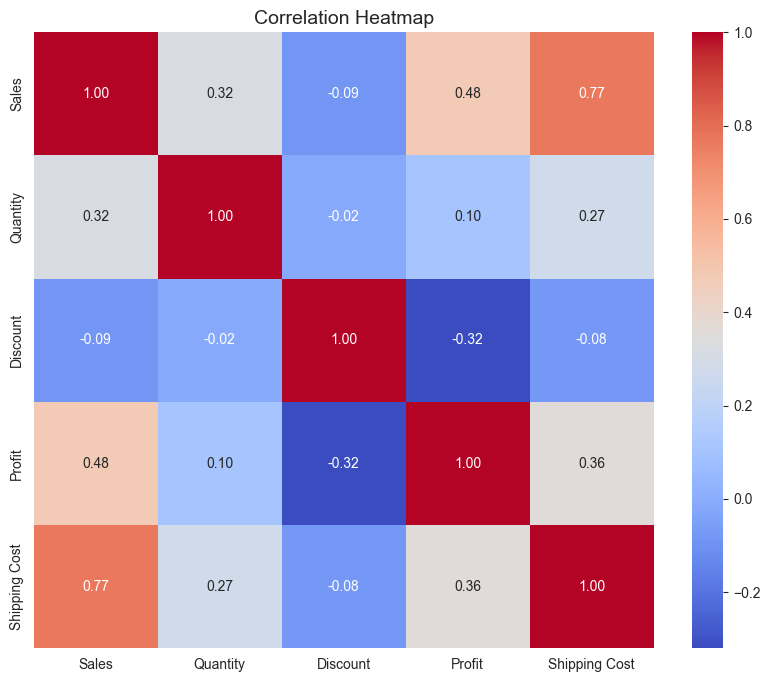

In [207]:
corr =df_final.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

In [208]:
df = df_final.copy()
df

,Order Priority,Market,Sales,Quantity,Discount,Profit,Shipping Cost,Category,Ship Mode
0,Medium,EMEA,78.408,6,0.7,-88.992,3.87,Technology,Standard Class
1,Medium,EMEA,82.674,2,0.7,-157.086,5.69,Office Supplies,Standard Class
2,Critical,Africa,47.640,1,0.0,23.340,13.85,Office Supplies,First Class
3,Critical,Africa,105.180,2,0.0,25.200,3.66,Office Supplies,First Class
4,Critical,Africa,293.850,1,0.0,61.680,70.93,Technology,First Class
...,...,...,...,...,...,...,...,...,...
49665,Medium,Africa,4.077,1,0.7,-9.513,0.09,Office Supplies,Standard Class
49666,Medium,Africa,7.164,2,0.7,-6.696,0.35,Office Supplies,Standard Class
49667,Medium,Africa,71.640,2,0.7,-93.180,4.05,Technology,Standard Class
49668,Medium,Africa,1.161,1,0.7,-2.349,0.07,Office Supplies,Standard Class


In [209]:
df[df.duplicated()]

,Order Priority,Market,Sales,Quantity,Discount,Profit,Shipping Cost,Category,Ship Mode
4119,Medium,US,19.440,3,0.0,9.3312,1.52,Office Supplies,Standard Class
4619,Medium,US,4.448,2,0.2,0.3336,0.33,Office Supplies,Standard Class
7175,Medium,US,13.392,3,0.2,3.1806,1.02,Office Supplies,Standard Class
8302,Medium,US,5.560,2,0.0,1.4456,0.42,Office Supplies,Standard Class
15728,Medium,EU,11.430,1,0.0,4.1100,0.55,Office Supplies,Second Class
31295,Medium,EMEA,110.040,1,0.0,8.7900,8.94,Furniture,Standard Class
42304,Medium,EMEA,6.000,1,0.0,1.2600,0.55,Office Supplies,Standard Class
46558,Medium,US,3.264,2,0.2,1.1016,0.29,Office Supplies,Standard Class
48585,Medium,US,20.736,4,0.2,7.2576,0.98,Office Supplies,Standard Class


In [210]:
df = df.drop_duplicates( keep='first')

In [211]:
print(df['Ship Mode'].unique())
print(df['Category'].unique())
print(df['Market'].unique())
print(df['Order Priority'].unique())

['Standard Class' 'First Class' 'Second Class' 'Same Day']
['Technology' 'Office Supplies' 'Furniture']
['EMEA' 'Africa' 'US' 'Canada' 'EU' 'APAC' 'LATAM']
['Medium' 'Critical' 'High' 'Low']


In [212]:

region_stats = df.groupby('Market')['Profit'].agg(['count','mean','median','std']).sort_values('count', ascending=False)
print(region_stats)

        count       mean   median         std
Market                                       
APAC    10216  38.109279  10.5000  168.288938
LATAM    9414  22.098162   8.0800  119.533791
US       9140  28.841223   8.4888  228.633878
EU       8249  33.643093  13.5000  173.485401
EMEA     4833  10.584315   5.2800  143.351039
Africa   4453  20.432905   7.7700  146.786882
Canada    376  46.947926  12.1950  116.575630


In [213]:



df_local = df.copy()
market_col = 'Market'
target_col = 'Profit'

mapping_business = {'US': 'North America','Canada': 'North America','EU': 'Europe','APAC': 'APAC','LATAM': 'LATAM','Africa': 'Africa_EMEA','EMEA': 'Africa_EMEA'}
df_local['market_grouped'] = df_local[market_col].map(mapping_business)

print("counts region_grouped:")
print(df_local['market_grouped'].value_counts(dropna=False))
print("Aggregated target stats by new region_grouped:")
print(df_local.groupby('market_grouped')[target_col].agg(['count','mean','median','std']).sort_values('count', ascending=False))


df_local

counts region_grouped:
market_grouped
APAC             10216
North America     9516
LATAM             9414
Africa_EMEA       9286
Europe            8249
Name: count, dtype: int64
Aggregated target stats by new region_grouped:
                count       mean   median         std
market_grouped                                       
APAC            10216  38.109279  10.5000  168.288938
North America    9516  29.556662   8.6665  225.290533
LATAM            9414  22.098162   8.0800  119.533791
Africa_EMEA      9286  15.307099   6.3600  145.084455
Europe           8249  33.643093  13.5000  173.485401


,Order Priority,Market,Sales,Quantity,Discount,Profit,Shipping Cost,Category,Ship Mode,market_grouped
0,Medium,EMEA,78.408,6,0.7,-88.992,3.87,Technology,Standard Class,Africa_EMEA
1,Medium,EMEA,82.674,2,0.7,-157.086,5.69,Office Supplies,Standard Class,Africa_EMEA
2,Critical,Africa,47.640,1,0.0,23.340,13.85,Office Supplies,First Class,Africa_EMEA
3,Critical,Africa,105.180,2,0.0,25.200,3.66,Office Supplies,First Class,Africa_EMEA
4,Critical,Africa,293.850,1,0.0,61.680,70.93,Technology,First Class,Africa_EMEA
...,...,...,...,...,...,...,...,...,...,...
49665,Medium,Africa,4.077,1,0.7,-9.513,0.09,Office Supplies,Standard Class,Africa_EMEA
49666,Medium,Africa,7.164,2,0.7,-6.696,0.35,Office Supplies,Standard Class,Africa_EMEA
49667,Medium,Africa,71.640,2,0.7,-93.180,4.05,Technology,Standard Class,Africa_EMEA
49668,Medium,Africa,1.161,1,0.7,-2.349,0.07,Office Supplies,Standard Class,Africa_EMEA


In [214]:
from sklearn.preprocessing import OrdinalEncoder

order = [['Low', 'Medium', 'High','Critical']]
encoder = OrdinalEncoder(categories=order)
df_local['Order Priority'] = encoder.fit_transform(df_local[['Order Priority']])+1


categories_order = [['Standard Class', 'First Class', 'Second Class', 'Same Day']]
oe = OrdinalEncoder(categories=categories_order)
df_local['Ship Mode'] = oe.fit_transform(df_local[['Ship Mode']])+1


df_oneHot = pd.get_dummies(df_local, columns=['Category','market_grouped'], drop_first=True,dtype=int)

df_oneHot

,Order Priority,Market,Sales,Quantity,Discount,Profit,Shipping Cost,Ship Mode,Category_Office Supplies,Category_Technology,market_grouped_Africa_EMEA,market_grouped_Europe,market_grouped_LATAM,market_grouped_North America
0,2.0,EMEA,78.408,6,0.7,-88.992,3.87,1.0,0,1,1,0,0,0
1,2.0,EMEA,82.674,2,0.7,-157.086,5.69,1.0,1,0,1,0,0,0
2,4.0,Africa,47.640,1,0.0,23.340,13.85,2.0,1,0,1,0,0,0
3,4.0,Africa,105.180,2,0.0,25.200,3.66,2.0,1,0,1,0,0,0
4,4.0,Africa,293.850,1,0.0,61.680,70.93,2.0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49665,2.0,Africa,4.077,1,0.7,-9.513,0.09,1.0,1,0,1,0,0,0
49666,2.0,Africa,7.164,2,0.7,-6.696,0.35,1.0,1,0,1,0,0,0
49667,2.0,Africa,71.640,2,0.7,-93.180,4.05,1.0,0,1,1,0,0,0
49668,2.0,Africa,1.161,1,0.7,-2.349,0.07,1.0,1,0,1,0,0,0


In [215]:
df_oneHot=df_oneHot.drop(['Market'], axis=1)
df_oneHot

,Order Priority,Sales,Quantity,Discount,Profit,Shipping Cost,Ship Mode,Category_Office Supplies,Category_Technology,market_grouped_Africa_EMEA,market_grouped_Europe,market_grouped_LATAM,market_grouped_North America
0,2.0,78.408,6,0.7,-88.992,3.87,1.0,0,1,1,0,0,0
1,2.0,82.674,2,0.7,-157.086,5.69,1.0,1,0,1,0,0,0
2,4.0,47.640,1,0.0,23.340,13.85,2.0,1,0,1,0,0,0
3,4.0,105.180,2,0.0,25.200,3.66,2.0,1,0,1,0,0,0
4,4.0,293.850,1,0.0,61.680,70.93,2.0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49665,2.0,4.077,1,0.7,-9.513,0.09,1.0,1,0,1,0,0,0
49666,2.0,7.164,2,0.7,-6.696,0.35,1.0,1,0,1,0,0,0
49667,2.0,71.640,2,0.7,-93.180,4.05,1.0,0,1,1,0,0,0
49668,2.0,1.161,1,0.7,-2.349,0.07,1.0,1,0,1,0,0,0


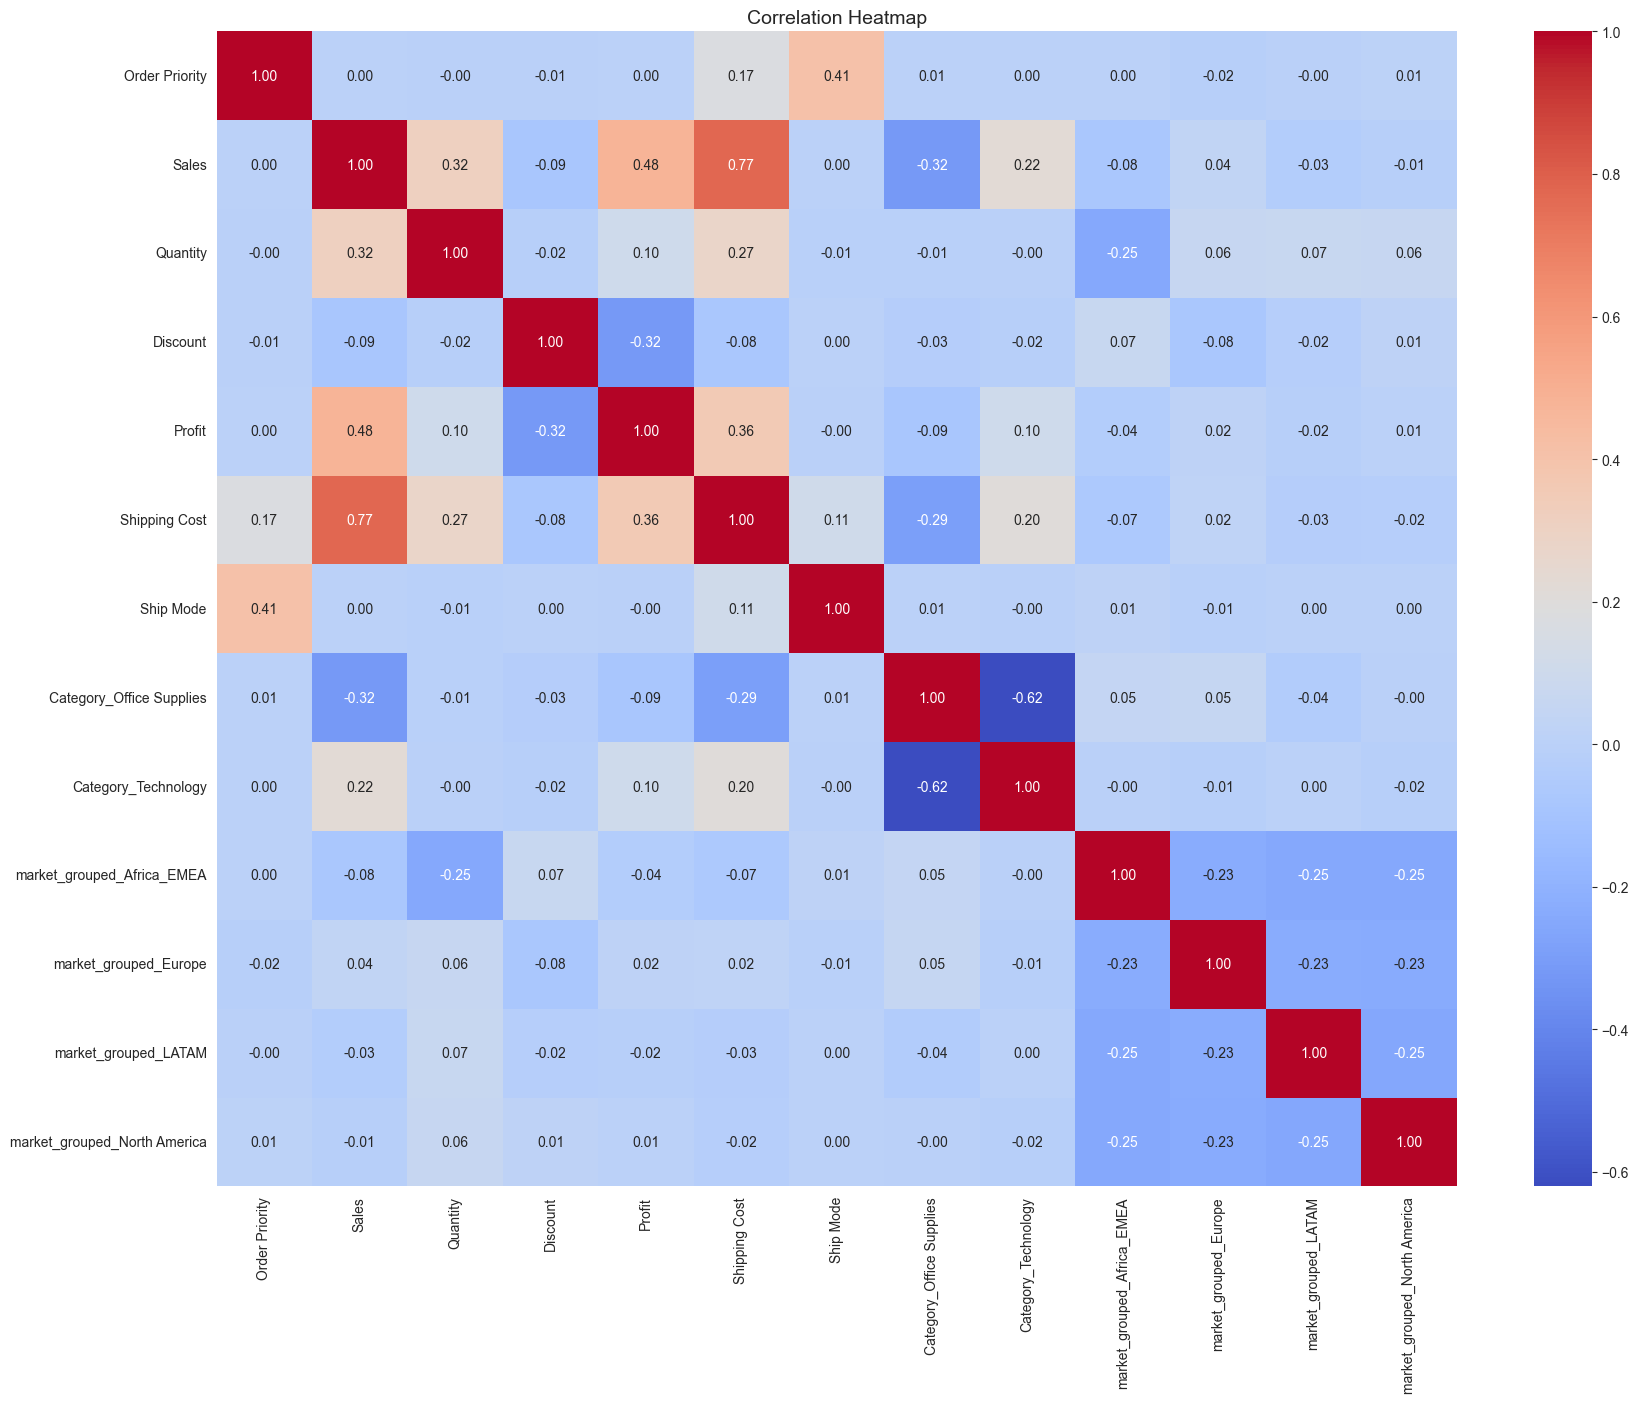

In [216]:
y = df_oneHot['Profit']
df_x = df_oneHot.drop(['Profit'], axis=1)
corr =df_oneHot.corr(numeric_only=True)
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

Text(0.5, 1.0, 'Scatter Plot: Hours Studied vs. Exam Score')

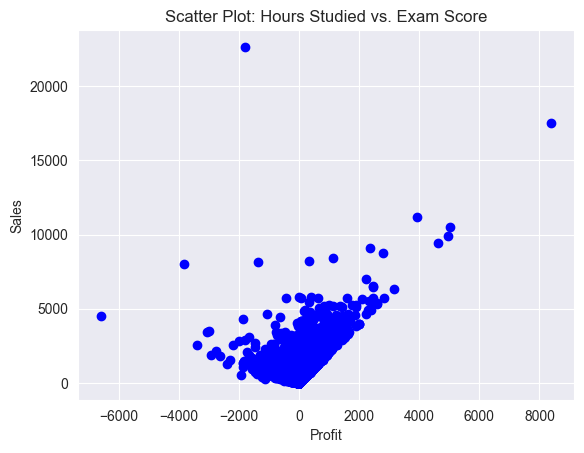

In [217]:
plt.scatter(df_oneHot["Profit"], df_oneHot["Sales"], color="blue", marker="o")

plt.xlabel("Profit")
plt.ylabel("Sales")
plt.title("Scatter Plot: Hours Studied vs. Exam Score")


In [218]:
df_oneHot= df_oneHot[~((df_oneHot["Sales"] < 5000) & (df_oneHot["Profit"] < -4000))]

In [219]:
df_oneHot= df_oneHot[((df_oneHot["Sales"] < 9000) & (df_oneHot["Profit"] <4000))]

Text(0.5, 1.0, 'Scatter Plot: Hours Studied vs. Exam Score')

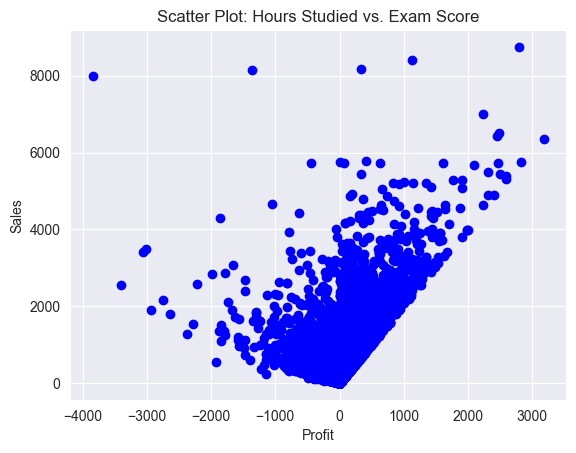

In [220]:
plt.scatter(df_oneHot["Profit"], df_oneHot["Sales"], color="blue", marker="o")

plt.xlabel("Profit")
plt.ylabel("Sales")
plt.title("Scatter Plot: Hours Studied vs. Exam Score")

In [221]:
df_oneHot

,Order Priority,Sales,Quantity,Discount,Profit,Shipping Cost,Ship Mode,Category_Office Supplies,Category_Technology,market_grouped_Africa_EMEA,market_grouped_Europe,market_grouped_LATAM,market_grouped_North America
0,2.0,78.408,6,0.7,-88.992,3.87,1.0,0,1,1,0,0,0
1,2.0,82.674,2,0.7,-157.086,5.69,1.0,1,0,1,0,0,0
2,4.0,47.640,1,0.0,23.340,13.85,2.0,1,0,1,0,0,0
3,4.0,105.180,2,0.0,25.200,3.66,2.0,1,0,1,0,0,0
4,4.0,293.850,1,0.0,61.680,70.93,2.0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49665,2.0,4.077,1,0.7,-9.513,0.09,1.0,1,0,1,0,0,0
49666,2.0,7.164,2,0.7,-6.696,0.35,1.0,1,0,1,0,0,0
49667,2.0,71.640,2,0.7,-93.180,4.05,1.0,0,1,1,0,0,0
49668,2.0,1.161,1,0.7,-2.349,0.07,1.0,1,0,1,0,0,0


In [222]:
# q1 = df_oneHot["Sales"].quantile(0.01)
# q3 = df_oneHot["Sales"].quantile(0.99)
# IQR = q3 - q1
# lower_whisker =q1-1.5*IQR
# upper_whisker=q3+1.5*IQR
# outliers = df_oneHot[(df_oneHot["Sales"]<lower_whisker) | (df_oneHot["Sales"]>upper_whisker)]
# outliers["Sales"].count()

In [223]:
# df_oneHot["Sales"] = df_oneHot["Sales"].mask(
#     (df_oneHot["Sales"] < lower_whisker) | (df_oneHot["Sales"] > upper_whisker),
#     np.nan
# )
# df_oneHot = df_oneHot.dropna()
# df_oneHot

In [224]:
# q1 = df_oneHot["Shipping Cost"].quantile(0.01)
# q3 = df_oneHot["Shipping Cost"].quantile(0.99)
# IQR = q3 - q1
# lower_whisker =q1-1.5*IQR
# upper_whisker=q3+1.5*IQR
# outliers = df_oneHot[(df_oneHot["Shipping Cost"]<lower_whisker) | (df_oneHot["Shipping Cost"]>upper_whisker)]
# outliers["Shipping Cost"].count()

In [225]:
# df_oneHot["Shipping Cost"] = df_oneHot["Shipping Cost"].mask(
#     (df_oneHot["Shipping Cost"] < lower_whisker) | (df_oneHot["Shipping Cost"] > upper_whisker),
#     np.nan
# )
# df_oneHot = df_oneHot.dropna()
# df_oneHot

In [226]:
# q1 = df_oneHot["Profit"].quantile(0.01)
# q3 = df_oneHot["Profit"].quantile(0.99)
# IQR = q3 - q1
# lower_whisker =q1-1.5*IQR
# upper_whisker=q3+1.5*IQR
# outliers = df_oneHot[(df_oneHot["Profit"]<lower_whisker) | (df_oneHot["Profit"]>upper_whisker)]
# outliers["Profit"].count()

In [227]:
# df_oneHot["Profit"] = df_oneHot["Profit"].mask(
#     (df_oneHot["Profit"] < lower_whisker) | (df_oneHot["Profit"] > upper_whisker),
#     np.nan
# )
# df_oneHot = df_oneHot.dropna()
# df_oneHot

In [228]:


df_oneHot["sales flag"]=np.where(df_oneHot['Sales']>=max(df_oneHot['Sales'])*0.9,1,0)
# X=df_oneHot[[
#     'Order Priority','Sales','Quantity','Discount','sales flag'
# ]]
y=df_oneHot['Profit'].values
X_train, X_test, y_train, y_test = train_test_split(df_oneHot.drop(['Profit'], axis=1),y,test_size=0.2,random_state=42)

df_oneHot



,Order Priority,Sales,Quantity,Discount,Profit,Shipping Cost,Ship Mode,Category_Office Supplies,Category_Technology,market_grouped_Africa_EMEA,market_grouped_Europe,market_grouped_LATAM,market_grouped_North America,sales flag
0,2.0,78.408,6,0.7,-88.992,3.87,1.0,0,1,1,0,0,0,0
1,2.0,82.674,2,0.7,-157.086,5.69,1.0,1,0,1,0,0,0,0
2,4.0,47.640,1,0.0,23.340,13.85,2.0,1,0,1,0,0,0,0
3,4.0,105.180,2,0.0,25.200,3.66,2.0,1,0,1,0,0,0,0
4,4.0,293.850,1,0.0,61.680,70.93,2.0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49665,2.0,4.077,1,0.7,-9.513,0.09,1.0,1,0,1,0,0,0,0
49666,2.0,7.164,2,0.7,-6.696,0.35,1.0,1,0,1,0,0,0,0
49667,2.0,71.640,2,0.7,-93.180,4.05,1.0,0,1,1,0,0,0,0
49668,2.0,1.161,1,0.7,-2.349,0.07,1.0,1,0,1,0,0,0,0


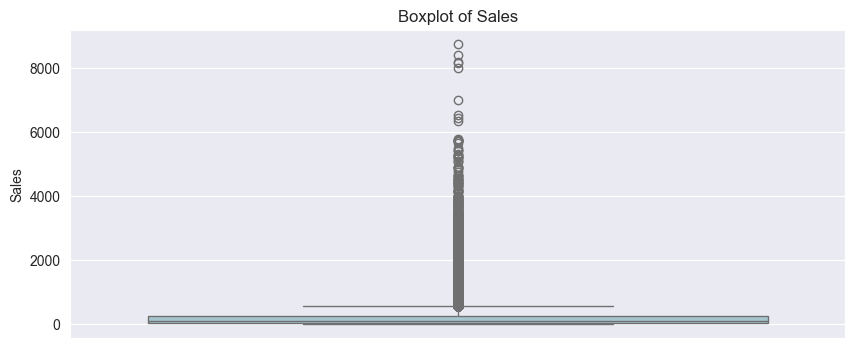

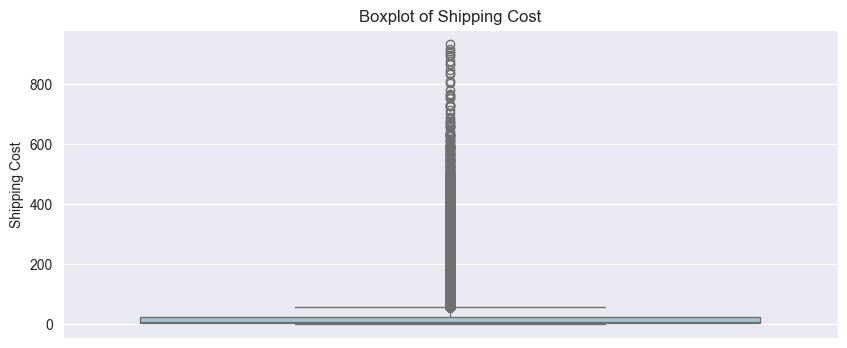

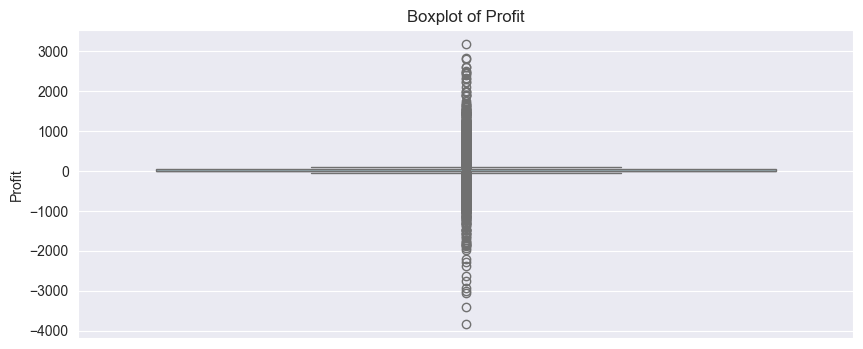

In [229]:
numeric_data=df_oneHot[["Sales",'Shipping Cost','Profit']].copy()

for col in numeric_data.columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(y=numeric_data[col], color='#9ECAD6')
    plt.title(f'Boxplot of {col}')
    plt.show()

In [230]:

mi = mutual_info_regression(X_train, y_train, random_state=42)
mi = pd.Series(mi, index=X_train.columns).sort_values(ascending=False)
top_k = mi.head().index
X_train_mutual = X_train[top_k]
X_test_mutual  = X_test[top_k]
X_train_mutual

,Sales,Discount,Shipping Cost,Quantity,Category_Office Supplies
32582,9.510,0.0,0.56,1,1
6704,81.360,0.2,4.73,5,1
12908,75.411,0.1,4.35,3,1
44940,166.890,0.0,9.26,1,0
42655,532.800,0.0,48.69,1,0
...,...,...,...,...,...
12062,296.640,0.0,17.85,2,0
47587,57.582,0.7,4.46,3,1
40854,5.850,0.7,0.31,2,1
902,30.360,0.0,3.63,2,1


In [231]:
input = [('scale',StandardScaler()),('polynomial', PolynomialFeatures(degree=2)),('model',LinearRegression())]
pipe = Pipeline(input)
pipe

,steps,"[('scale', ...), ('polynomial', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,degree,2
,interaction_only,False
,include_bias,True
,order,'C'


In [235]:
pipe.fit(X_train_mutual,y_train)
pipe.score(X_train_mutual,y_train)

0.6675932106605442

In [236]:
#testing the model
pipe_pred = pipe.predict(X_test_mutual)
r2_score(y_test,pipe_pred)

0.6762522252523115

In [237]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
scaler = StandardScaler()
# X_train[['Sales','Shipping Cost']] = scaler.fit_transform(X_train[['Sales','Shipping Cost']])
# X_test[['Sales','Shipping Cost']] = scaler.fit_transform(X_test[['Sales','Shipping Cost']])

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#

# pca = PCA(n_components=5)
# X_train_pca = pca.fit_transform(X_train)
# X_test_pca  = pca.transform(X_test)


# scaler= RobustScaler()
# scaler.fit(X_train)
# scaler.fit(X_test)
# X_train_scaled = X_train.copy()
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = X_test.copy()
# X_test_scaled = scaler.transform(X_test)


In [238]:
from sklearn.model_selection import KFold

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

param_grid = {
    'n_estimators': [500],
    'max_depth': [5,10,15,20],
    'min_samples_split': [15,20],
    'min_samples_leaf': [ 1,3, 5,7]

}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

gscv = GridSearchCV(estimator=rf,param_grid=param_grid, scoring='r2',cv=3,n_jobs=2,verbose=1)

gscv.fit(X_train, y_train)

print("Best params:", gscv.best_params_)
print("Best CV R2 (mean):", gscv.best_score_)

best_rf = gscv.best_estimator_
pred = best_rf.predict(X_test)
pred_train = best_rf.predict(X_train)

mae  = mean_absolute_error(y_test, pred)

r2   = r2_score(y_test, pred)
r2_trian   = r2_score(y_train, pred_train)
print({'MAE': mae, 'R2_test': r2, 'r2_trian': r2_trian})



Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best params: {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 15, 'n_estimators': 500}
Best CV R2 (mean): 0.6757995589712574
{'MAE': 33.738955626644575, 'R2_test': 0.6953247515453223, 'r2_trian': 0.791229601853758}


In [247]:

results = pd.DataFrame({
    "y_test": y_test,
    "Y_predict": pred
})
results.to_csv("predict_rf.csv", index=False)
results


,y_test,Y_predict
0,-46.0638,18.857569
1,553.3900,339.704761
2,1.1808,3.444099
3,49.7610,-158.595987
4,-65.4600,-40.191893
...,...,...
9330,46.2600,43.658388
9331,101.6400,63.064832
9332,-71.8400,-65.945317
9333,26.3700,13.371102


In [249]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    objective='reg:squarederror',
    tree_method='hist',
    n_jobs=-1,
    random_state=42
)

param_grid = {
    'n_estimators': [100,300],
    'learning_rate': [0.05, 0.1],
    'max_depth': [4,8,15],
    'min_child_weight': [1, 3,5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_lambda': [1.0, 2.0],
    'reg_alpha': [0.0, 0.1],
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

gscv = GridSearchCV(estimator=xgb,param_grid=param_grid,scoring='r2',cv=cv,n_jobs=-1,verbose=1)

gscv.fit(X_train, y_train)
print("Best Params:", gscv.best_params_)
print("Best CV R2:", gscv.best_score_)
best_model = gscv.best_estimator_
y_pred = best_model.predict(X_test)
r2   = r2_score(y_test, y_pred)



print(f"R2 score: {r2:.4f}")

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best Params: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 100, 'reg_alpha': 0.0, 'reg_lambda': 2.0, 'subsample': 1.0}
Best CV R2: 0.6787336482252395
R2 score: 0.6682


In [250]:

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

pred_test= xgb.predict(X_test)
pred_train= xgb.predict(X_train)

mae_test=mean_absolute_error(y_test, pred_test)

r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred_test)

print("", {"MAE test": mae_test,  "R2 train": r2_train, "r2 test": r2_test})


 {'MAE test': 35.05837077734404, 'R2 train': 0.9041996727201836, 'r2 test': 0.637959699700727}


In [251]:
xgb.feature_importances_

array([0.03813607, 0.24756782, 0.03545927, 0.35292506, 0.03054961,
       0.03524995, 0.03417658, 0.03751163, 0.02814497, 0.03530766,
       0.03637943, 0.05622027, 0.03237169], dtype=float32)

In [252]:

from sklearn.ensemble import HistGradientBoostingRegressor
gbr = HistGradientBoostingRegressor(max_depth=9,learning_rate=0.05,max_iter=2000,early_stopping=True,validation_fraction=0.2 ,min_samples_leaf=20,l2_regularization=1.0,random_state=42)
gbr.fit(X_train, y_train)

pred_train = gbr.predict(X_train)
pred_test  = gbr.predict(X_test)



print("HGBR — Train R2:", r2_score(y_train, pred_train),"HGBR — Test  R²:", r2_score(y_test, pred_test))


HGBR — Train R2: 0.7178805949031901 HGBR — Test  R²: 0.6684444376511902
